In [1]:
from sklearn.cluster import KMeans

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("credit_customers.csv")

In [3]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [4]:
df.drop(['checking_status', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'job', 'num_dependents', 'own_telephone', 'foreign_worker', 'class', 'credit_history', 'residence_since', 'housing', 'age'], axis=1, inplace=True)

In [5]:
df.describe()

,duration,credit_amount,installment_commitment,existing_credits
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,1.407000
std,12.058814,2822.736876,1.118715,0.577654
min,4.000000,250.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,1.000000
50%,18.000000,2319.500000,3.000000,1.000000
75%,24.000000,3972.250000,4.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000


In [6]:
centers = range(1, 9)

In [7]:
clusters = [KMeans(n_clusters=center) for center in centers]

In [8]:
scores = [model.fit(df).score(df) for model in clusters]

d:\Universidad\2023-1\Algoritmica\practico-5\practico_5_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Universidad\2023-1\Algoritmica\practico-5\practico_5_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Universidad\2023-1\Algoritmica\practico-5\practico_5_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Universidad\2023-1\Algoritmica\practico-5\practico_5_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

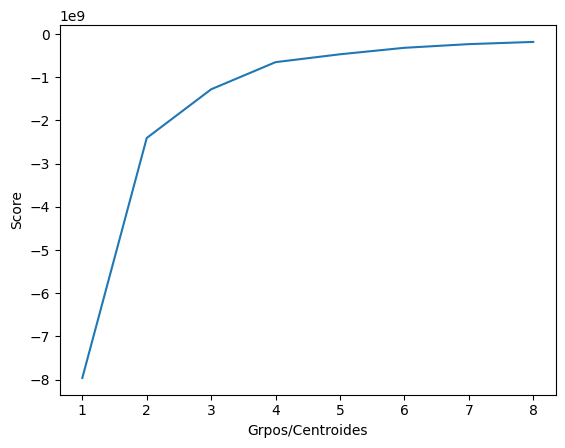

In [9]:
plt.plot(centers, scores)
plt.xlabel('Grpos/Centroides')
plt.ylabel('Score')
plt.show()

In [10]:
k_means = KMeans(n_clusters=4)

In [11]:
k_means.fit(df)

d:\Universidad\2023-1\Algoritmica\practico-5\practico_5_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

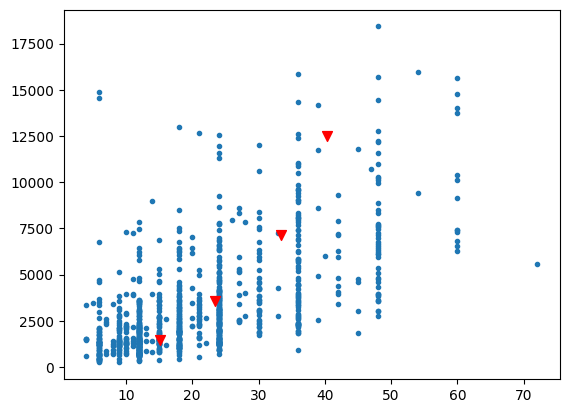

In [12]:
plt.scatter(df.to_numpy()[:, 0], df.to_numpy()[:, 1], marker='.')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='v', c='r', s=50)
plt.show()

In [23]:
k_means.cluster_centers_

array([[3.33461538e+01, 7.12752308e+03, 2.53846154e+00, 1.48461538e+00],
       [1.50827206e+01, 1.47131066e+03, 3.26286765e+00, 1.40441176e+00],
       [4.02619048e+01, 1.25117143e+04, 2.35714286e+00, 1.40476190e+00],
       [2.34929577e+01, 3.58730634e+03, 2.70774648e+00, 1.37676056e+00]])

In [24]:
df.head()

,duration,credit_amount,installment_commitment,existing_credits
0,6.0,1169.0,4.0,2.0
1,48.0,5951.0,2.0,1.0
2,12.0,2096.0,2.0,1.0
3,42.0,7882.0,2.0,1.0
4,24.0,4870.0,3.0,2.0


In [70]:
credit_risk_customer_groups = ['bajo', 'muy bajo', 'alto', 'medio']

In [85]:
duration = 1
credit_amount = 5000
installment_commitment = 4
existing_credits = 2
predicted = k_means.predict([[duration, credit_amount, installment_commitment, existing_credits]])
print(f'Un cliente con una duración de crédito de {duration} mes(es), un monto de crédito de ${credit_amount}, un compromiso de pago de {installment_commitment}% y {existing_credits} crédito(s) existente(s) tiene un riesgo de crédito: {credit_risk_customer_groups[predicted[0]]}')

Un cliente con una duración de crédito de 1 mes(es), un monto de crédito de $5000, un compromiso de pago de 4% y 2 crédito(s) existente(s) tiene un riesgo de crédito: medio


d:\Universidad\2023-1\Algoritmica\practico-5\practico_5_env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
